In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from scipy.stats import norm
from pgmpy.estimators import PC
os.chdir("..")
from scripts.pc_algo_tools import *
from scripts.demo_utils import *
from dotenv import load_dotenv
load_dotenv("globs.env")
media_dir = os.getenv("MEDIA_DIR")

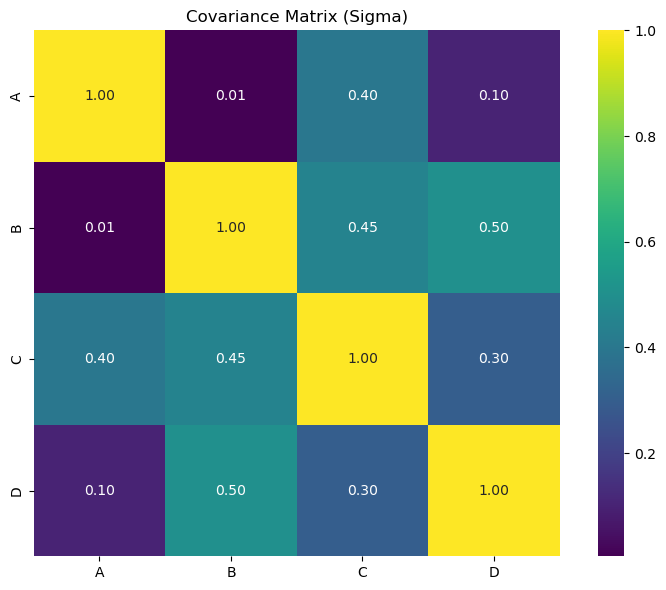

In [2]:
nodes = ["A", "B", "C", "D"]

Sigma = np.array([
    [1.00, 0.005, 0.40, 0.10],   # A
    [0.005, 1.00, 0.45, 0.50],   # B
    [0.40, 0.45, 1.00, 0.30],    # C
    [0.10, 0.50, 0.30, 1.00],    # D
])


plt.figure(figsize=(8,6))
sns.heatmap(Sigma, xticklabels=nodes, yticklabels=nodes,
            cmap="viridis", annot=True, fmt=".2f",
            cbar=True, square=True)

plt.title("Covariance Matrix (Sigma)")
plt.tight_layout()
plt.savefig(media_dir + "/sigma.png")
plt.show()

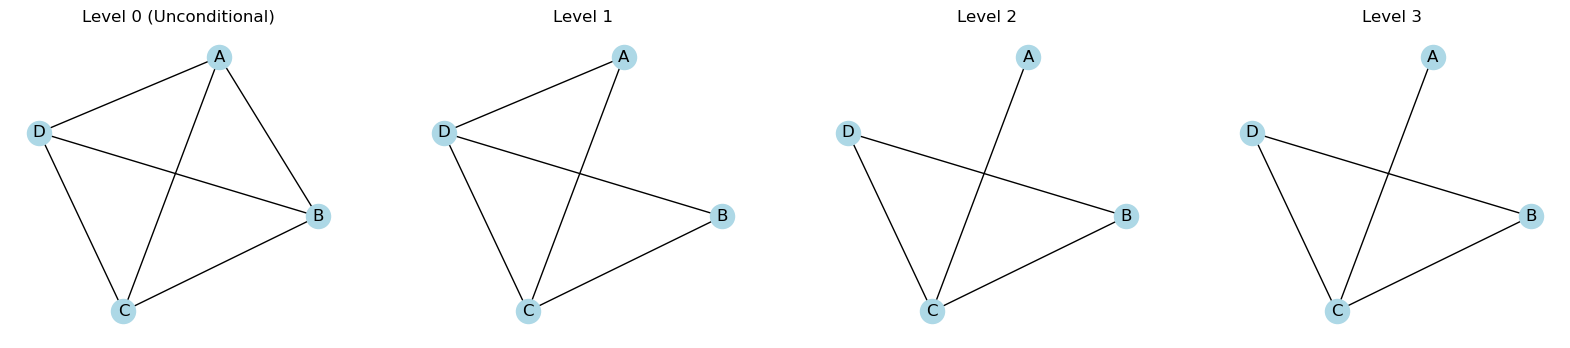

,level,edge,u,v,cond_set,i,j,cond,rho,z,stat,crit,independent,removed
0,0,A-B,A,B,(),0,1,[],0.032536,0.032547,1.259285,1.959964,True,True
1,0,A-C,A,C,(),0,2,[],0.411121,0.436959,16.906418,1.959964,False,False
2,0,A-D,A,D,(),0,3,[],0.124471,0.125120,4.841035,1.959964,False,False
3,0,B-C,B,C,(),1,2,[],0.456787,0.493244,19.084129,1.959964,False,False
4,0,B-D,B,D,(),1,3,[],0.484378,0.528688,20.455517,1.959964,False,False
5,0,C-D,C,D,(),2,3,[],0.299652,0.309138,11.960867,1.959964,False,False
6,1,A-C,A,C,"(D,)",0,2,[3],0.394899,0.417590,16.151632,1.959964,False,False
7,1,A-D,A,D,"(C,)",0,3,[2],0.001470,0.001470,0.056840,1.959964,True,True
8,1,B-C,B,C,"(D,)",1,2,[3],0.373377,0.392342,15.175049,1.959964,False,False
9,1,B-D,B,D,"(C,)",1,3,[2],0.409451,0.434951,16.823114,1.959964,False,False


In [3]:
p = len(nodes)
np.random.seed(0)
X = np.random.multivariate_normal(np.zeros(p), Sigma, size=1500)

max_levels = 3
fig, axarr = plt.subplots(1, max_levels+1, figsize=(20,4))
final_graph, logs = pc_skeleton_verbose_plot(X, nodes, axarr)
plt.savefig(media_dir + "/pc_demo.png")
plt.show()

df = pd.DataFrame(logs)
df_to_image(df.round(2), media_dir + "/pc_logs.png")
df

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'A': 'N', 'B': 'N', 'C': 'N', 'D': 'N'}


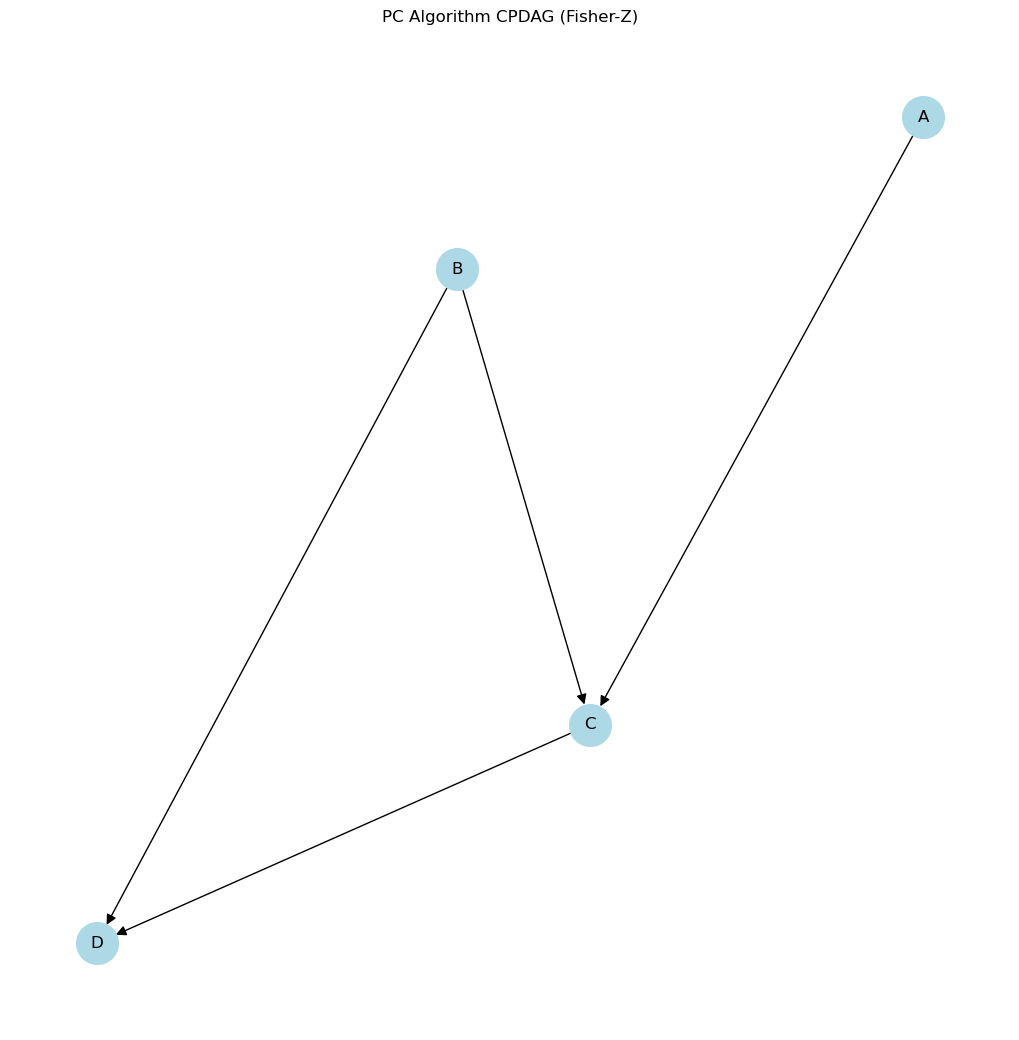

In [4]:
X_df = pd.DataFrame(X, columns=["A","B","C","D"])
G = run_pc(X_df)
plot_graph(G, "PC Algorithm CPDAG (Fisher-Z)", media_dir + "/demo_directed_pc_graph.png")
G.edges()
plt.show()